# How to Normalize Data in Python

## Learning Objectives
Part of the objective of data preparation, is to transform our data in order to make it more suitable for machine learning. During this step, we often have to restructure some of our data so that it conforms to a particular characteristic. This is known as **normalization** or **standardization**. There are several ways to normalize data in Python. By the end of the tutorial, you will have learned:

+ how to perform min-max normalization
+ how to perform z-score normalization

In [1]:
import pandas as pd
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,citympg,cylinders,displacement,drive,highwaympg,make,model,class,year,transmissiontype,transmissionspeeds,co2emissions
0,14.0,6,4.1,2-Wheel Drive,19.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
1,14.0,8,5.0,2-Wheel Drive,20.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
2,18.0,8,5.7,2-Wheel Drive,26.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,484.761905
3,21.0,6,4.3,Rear-Wheel Drive,31.0,Cadillac,Fleetwood/DeVille (FWD),Large Cars,1984,Automatic,4,424.166667
4,14.0,8,4.1,Rear-Wheel Drive,19.0,Cadillac,Brougham/DeVille (RWD),Large Cars,1984,Automatic,4,555.437500


<Axes: ylabel='Frequency'>

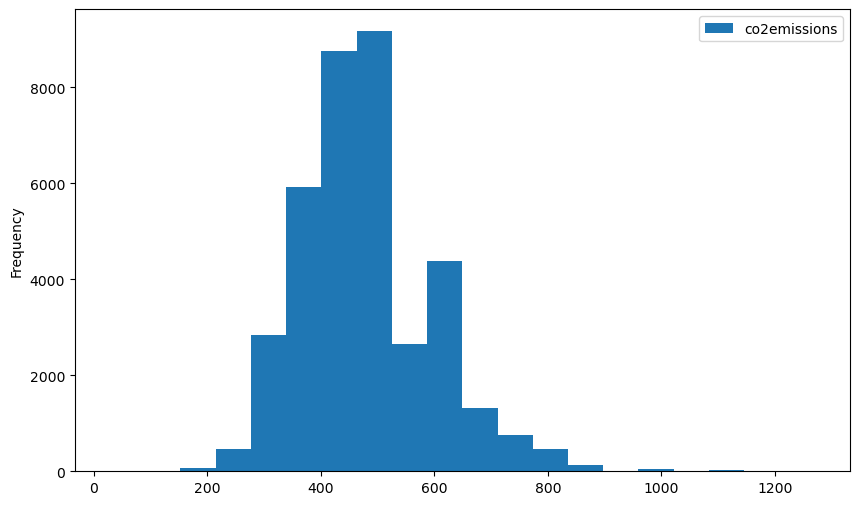

In [4]:
%matplotlib inline
vehicles[['co2emissions']].plot(kind = 'hist', 
                                bins = 20, 
                                figsize = (10, 6))

## How to perform min-max Normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
minmax = MinMaxScaler()
co2emissions_mm = minmax.fit_transform(vehicles[['co2emissions']])

(array([4.000e+00, 5.000e+00, 6.200e+01, 4.670e+02, 2.841e+03, 5.919e+03,
        8.749e+03, 9.168e+03, 2.650e+03, 4.377e+03, 1.310e+03, 7.570e+02,
        4.640e+02, 1.360e+02, 0.000e+00, 4.000e+01, 0.000e+00, 2.500e+01,
        0.000e+00, 5.000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

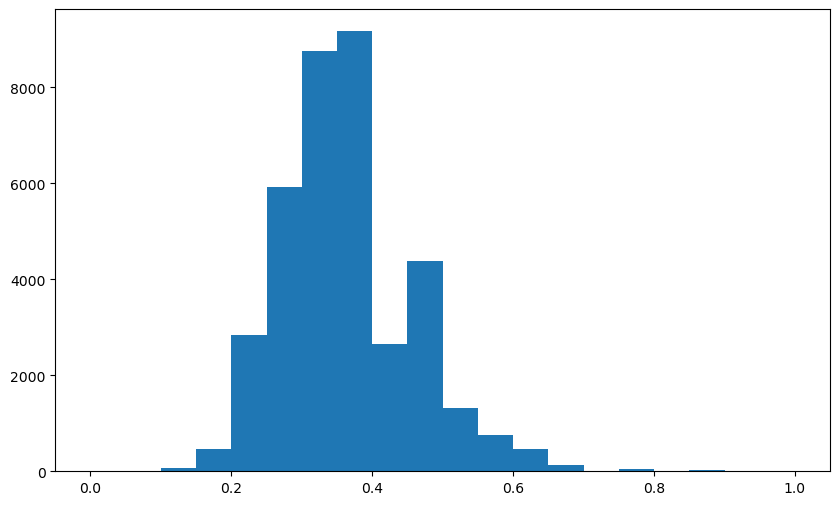

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(co2emissions_mm, bins=20)

### The Point of transformation is to change the scale/range of the values while maintaining the distribution.

## How to perform z-score Normalization

In [45]:
from sklearn.preprocessing import StandardScaler

In [47]:
co2emissions_zm = StandardScaler().fit_transform(vehicles[['co2emissions']])
co2emissions_zm = pd.DataFrame(co2emissions_zm, columns = ['co2emissions'])
co2emissions_zm.describe()

,co2emissions
count,3.697900e+04
mean,-1.844617e-16
std,1.000014e+00
min,-3.799572e+00
25%,-6.498927e-01
50%,-7.482706e-02
75%,6.697254e-01
max,6.732510e+00


<Axes: ylabel='Frequency'>

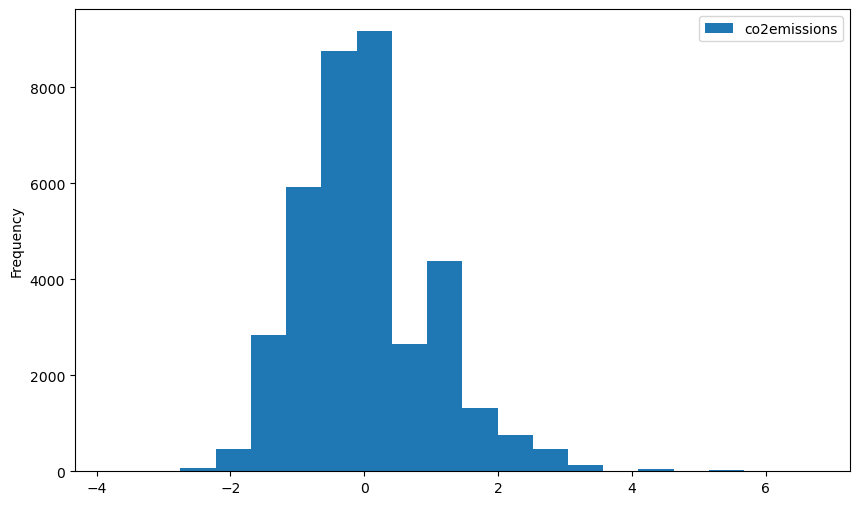

In [49]:
co2emissions_zm.plot(kind = 'hist', 
                     bins = 20, 
                     figsize = (10, 6))

In [51]:
co2emissions_zm

,co2emissions
0,0.669725
1,0.669725
2,0.069711
3,-0.444725
4,0.669725
...,...
36974,-0.293325
36975,-0.089572
36976,0.224547
36977,1.565920


In [53]:
StandardScaler().fit_transform(vehicles[['co2emissions']])

array([[0.6697254 ],
       [0.6697254 ],
       [0.06971065],
       ...,
       [0.22454665],
       [1.56591957],
       [0.58960383]])

In [59]:
pd.DataFrame(StandardScaler().fit_transform(vehicles[['co2emissions']]),columns=['co2emissions'])

,co2emissions
0,0.669725
1,0.669725
2,0.069711
3,-0.444725
4,0.669725
...,...
36974,-0.293325
36975,-0.089572
36976,0.224547
36977,1.565920
